In [44]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import math
from numpy import genfromtxt
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import os

In [26]:
# os.environ["PATH"] += os.pathsep + '/usr/local/texlive/2019/bin/x86_64-darwin'
print(os.getenv("PATH"))

/Library/Frameworks/Python.framework/Versions/3.6/bin:/Library/Frameworks/Python.framework/Versions/3.6/bin:/Users/mikhailgasanov/anaconda3/bin:/Users/mikhailgasanov/anaconda3/condabin:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin:/Library/TeX/texbin:/opt/X11/bin:/usr/local/texlive/2019/bin/x86_64-darwin


In [27]:
lgndsize = 'large'
fontsize = 'xx-large'
params = {'text.usetex': True,
          'text.latex.preamble': [ # to conform with acmart style
              r'\usepackage[T1]{fontenc}',
              r'\usepackage[libertine]{newtxmath}',
              r'\usepackage{libertine}'
          ],
          'font.weight': 'regular',
          'legend.fontsize': lgndsize,         
          'axes.labelsize': fontsize,
          'axes.titlesize': fontsize,
          'xtick.labelsize': lgndsize,
          'ytick.labelsize': lgndsize,
         }

plt.style.use(['seaborn-whitegrid']) # see plt.style.available
plt.rcParams.update(params)

In [28]:
sns.set_style('whitegrid', {'axes_linewidth': 0, 'axes.edgecolor': 'white'})
    
def is_significant(value, confidence_interval, threshold="conf"):
    if threshold == "conf":
        return value - abs(confidence_interval) > 0
    else:
        return value - abs(float(threshold)) > 0
 
def grouped_radial(SAresults, parameters, radSc=2.0, scaling=1, widthSc=0.5, STthick=1, varNameMult=1.3, colors=None, groups=None, gpNameMult=1.5, threshold="conf"):
    # Derived from https://github.com/calvinwhealton/SensitivityAnalysisPlots
    fig, ax = plt.subplots(1, 1)
    color_map = {}
     
    # initialize parameters and colors
    if groups is None:
         
        if colors is None:
            colors = ["k"]
         
        for i, parameter in enumerate(parameters):
            color_map[parameter] = colors[i % len(colors)]
    else:        
        if colors is None:
            colors = sns.color_palette("deep", max(3, len(groups)))
         
        for i, key in enumerate(groups.keys()):
            #parameters.extend(groups[key])
             
            for parameter in groups[key]:
                color_map[parameter] = colors[i % len(colors)]
     
    n = len(parameters)
    angles = radSc*math.pi*np.arange(0, n)/n
    x = radSc*np.cos(angles)
    y = radSc*np.sin(angles)
     
    # plot second-order indices
    for i, j in itertools.combinations(range(n), 2):
        #key1 = parameters[i]
        #key2 = parameters[j]
         
        if is_significant(SAresults["S2"][i][j], SAresults["S2_conf"][i][j], threshold):
            angle = math.atan((y[j]-y[i])/(x[j]-x[i]))
                 
            if y[j]-y[i] < 0:
                angle += math.pi
                 
            line_hw = scaling*(max(0, SAresults["S2"][i][j])**widthSc)/2
                 
            coords = np.empty((4, 2))
            coords[0, 0] = x[i] - line_hw*math.sin(angle)
            coords[1, 0] = x[i] + line_hw*math.sin(angle)
            coords[2, 0] = x[j] + line_hw*math.sin(angle)
            coords[3, 0] = x[j] - line_hw*math.sin(angle)
            coords[0, 1] = y[i] + line_hw*math.cos(angle)
            coords[1, 1] = y[i] - line_hw*math.cos(angle)
            coords[2, 1] = y[j] - line_hw*math.cos(angle)
            coords[3, 1] = y[j] + line_hw*math.cos(angle)
 
            ax.add_artist(plt.Polygon(coords, color="0.75"))
         
    # plot total order indices
    for i, key in enumerate(parameters):
        if is_significant(SAresults["ST"][i], SAresults["ST_conf"][i], threshold):
            ax.add_artist(plt.Circle((x[i], y[i]), scaling*(SAresults["ST"][i]**widthSc)/2, color='w'))
            ax.add_artist(plt.Circle((x[i], y[i]), scaling*(SAresults["ST"][i]**widthSc)/2, lw=STthick, color='0.4', fill=False))
     
    # plot first-order indices
    for i, key in enumerate(parameters):
        if is_significant(SAresults["S1"][i], SAresults["S1_conf"][i], threshold):
            ax.add_artist(plt.Circle((x[i], y[i]), scaling*(SAresults["S1"][i]**widthSc)/2, color='0.4'))
            
    # add labels
    for i, key in enumerate(parameters):                
        ax.text(varNameMult*x[i], varNameMult*y[i], key, ha='center', va='center',
                rotation=angles[i]*360/(2*math.pi) - 90,
                color=color_map[key])
         
    if groups is not None:
        for i, group in enumerate(groups.keys()):
            print(group)
            group_angle = np.mean([angles[j] for j in range(n) if parameters[j] in groups[group]])
             
            ax.text(gpNameMult*radSc*math.cos(group_angle), gpNameMult*radSc*math.sin(group_angle), group, ha='center', va='center',
                rotation=group_angle*360/(2*math.pi) - 90,
                color=colors[i % len(colors)])
             
    ax.set_facecolor('white')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.axis('equal')
    plt.axis([-2*radSc, 2*radSc, -2*radSc, 2*radSc])
    #plt.show()
 
     
    return fig

In [29]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import math
from SALib.sample import saltelli
from SALib.analyze import sobol
#from lake_problem import lake_problem
#from grouped_radial import grouped_radial

In [30]:
!ls

Radial Convergence Plots.ipynb potato-2019.csv
SA_6_param                     soybean-000-2015.png
SA_horizonts                   soybean-000-2015.svg
Sample_vis                     spring-barley-2012.png
Vector_logo                    sugar-beat-2011.png
files_for_js                   sugar-beat-2014.png
monica_sensitivity             sugar-beat-2017.png


In [32]:
!cd /Users/mikhailgasanov/MONICA/monica_sensitivity/sobol/6_param/Sobol/

In [7]:
!pwd

/Users/mikhailgasanov/MONICA


In [31]:
list_of_csv=['soybean-000-2015.csv', 'sugar-beet-2011.csv', 'sugar-beet-2017.csv',
'spring-barley-2012.csv', 'sugar-beet-2014.csv']

In [32]:
problem = {
    'num_vars':6,
    'names':['SOC', 'Sand', 'Clay', 'pH', 'CN', 'BD'],
    'bounds':[[2.58, 6.20],
              [0.01, 0.30],
              [0.01, 0.30],
              [4.6, 6.9],
              [10.9, 12.4],
              [900, 1350]]}

In [52]:
list_of_names=['soybean-000-2015', 'sugar-beat-2011', 'sugar-beat-2017',
'spring-barley-2012', 'sugar-beat-2014']

In [34]:
list_of_totals=['total_SI_'+x for x in list_of_names]
list_of_first=['fisrt_SI_'+x for x in list_of_names]
list_of_second=['second_SI_'+x for x in list_of_names]
list_of_SI=['SI_'+x for x in list_of_names]

In [36]:
for j, i in enumerate(list_of_csv):
        all_data_csv = genfromtxt('/Users/mikhailgasanov/monica/SA_6_param/N_100000/'+str(i), delimiter=',')
        output = all_data_csv[:,2]
        print(i)
        list_of_SI[j] = sobol.analyze(problem, output, calc_second_order=True, conf_level=0.95, print_to_console=False)

soybean-000-2015.csv
sugar-beet-2011.csv
sugar-beet-2017.csv
spring-barley-2012.csv
sugar-beet-2014.csv


Soil physics
Soil chemistry


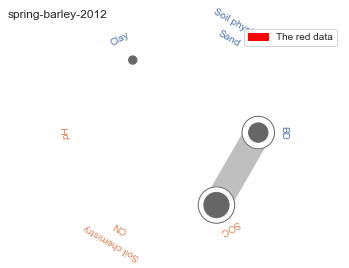

In [25]:
# Define the problem for SALib
problem = {
    'num_vars':6,
    'names':['SOC', 'Sand', 'Clay', 'pH', 'CN', 'BD'],
    'bounds':[[2.58, 6.20],
              [0.01, 0.30],
              [0.01, 0.30],
              [4.6, 6.9],
              [10.9, 12.4],
              [900, 1350]]
}
 
# generate Sobol samples
# param_samples = saltelli.sample(problem, 1000)
 
# extract each parameter for input into the lake problem
# b_samples = param_samples[:,0]
# q_samples = param_samples[:,1]
# mean_samples = param_samples[:,2]
# stdev_samples = param_samples[:,3]
# delta_samples = param_samples[:,4]
 
 
# samples through the lake problem using a constant policy of .02 emissions
# pollution_limit = np.ones(100)*0.02
 
# initialize arrays to store responses
# max_P = np.zeros(len(param_samples))
# utility = np.zeros(len(param_samples))
# inertia = np.zeros(len(param_samples))
# reliability = np.zeros(len(param_samples))
 
# run model across Sobol samples
# for i in range(0, len(param_samples)):
#     print("Running sample " + str(i) + ' of ' + str(len(param_samples)))
#     max_P[i], utility[i], inertia[i], reliability[i] = lake_problem(pollution_limit,
#                                                                     b=b_samples[i],
#                                                                     q=q_samples[i],
#                                                                     mean=mean_samples[i],
#                                                                     stdev=stdev_samples[i],
#                                                                     delta=delta_samples[i])
 
#Get sobol indicies for each response
# SA_max_P = sobol.analyze(problem, max_P, print_to_console=False)
# SA_reliability = sobol.analyze(problem, reliability, print_to_console=True)
# SA_inertia = sobol.analyze(problem, inertia, print_to_console=False)
# SA_utility = sobol.analyze(problem, utility, print_to_console=False)
 
# define groups for parameter uncertainties
groups={"Soil physics" : ["Sand", "Clay", "BD"],
        "Soil chemistry" : ["pH", "SOC", "CN"]}
 

fig = grouped_radial(list_of_SI[3], ['BD', 'Sand', 'Clay', 'pH', 'CN', 'SOC'], groups=groups, threshold=0.025)
red_patch = mpatches.Patch(color='red', label='The red data')
# plt.legend(handles=[red_patch])
plt.title(list_of_names[3], loc='left')
# ax = plt.subplots()

# ax.plot(label = list_of_names[0])

# ax.legend(fontsize = 25,
#           ncol = 1,    #  количество столбцов
#           facecolor = 'oldlace',    #  цвет области
#           edgecolor = 'r',    #  цвет крайней линии
#           title = 'Прямые',    #  заголовок
#           title_fontsize = '20'    #  размер шрифта заголовка
#          )
plt.show()

# plt.savefig('grafik.png', dpi=300)

In [42]:
list_of_SI[0]

{'S1': array([ 1.81108860e-02,  9.27674535e-04,  8.91079208e-01, -7.64988043e-05,
        -6.17631270e-05,  4.06130600e-04]),
 'S1_conf': array([0.0024414 , 0.00130682, 0.02010602, 0.00015221, 0.00014863,
        0.00227957]),
 'ST': array([7.22179963e-02, 1.16366160e-02, 9.73864635e-01, 1.12906157e-04,
        1.31636929e-04, 6.26272809e-02]),
 'ST_conf': array([2.13299913e-03, 6.92735314e-04, 1.00899128e-02, 6.95992693e-05,
        7.07258867e-05, 2.09129494e-03]),
 'S2': array([[            nan, -2.81861803e-04,  1.79788936e-02,
         -3.90186121e-04, -3.94728350e-04,  4.68245637e-03],
        [            nan,             nan,  5.70440682e-03,
         -2.85723358e-04, -2.83828571e-04, -1.29528438e-04],
        [            nan,             nan,             nan,
          3.89952527e-03,  3.89682910e-03,  2.92581977e-02],
        [            nan,             nan,             nan,
                     nan, -1.16781516e-07,  1.02126285e-05],
        [            nan,             

soybean-000-2015
sugar-beat-2011
sugar-beat-2017
spring-barley-2012
sugar-beat-2014


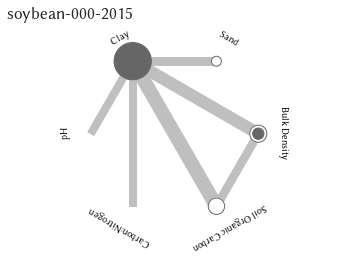

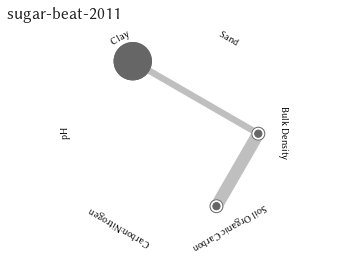

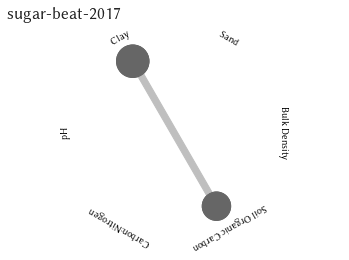

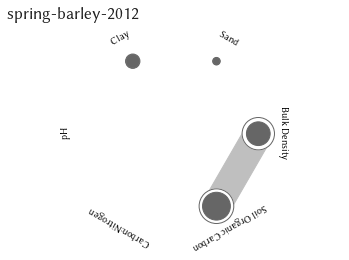

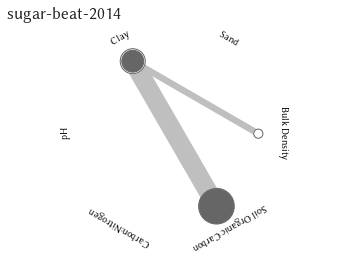

In [54]:
groups={"Soil physics" : ["Sand", "Clay", "BD"],
        "Soil chemistry" : ["pH", "SOC", "CN"]}
for i in range(len(list_of_SI)):
    print(list_of_names[i])
    fig = grouped_radial(list_of_SI[i], ['Bulk Density', 'Sand', 'Clay', 'pH', 'Carbon:Nitrogen', 'Soil Organic Carbon'], groups=None, threshold=0.001, radSc=2.0, \
    scaling=0.9, widthSc=0.3, STthick=1, varNameMult=1.3, gpNameMult=1.6,)
#     plt.show()
    plt.title(list_of_names[i], loc='left')
    plt.savefig(list_of_names[i]+'.eps')

In [47]:
!pwd

/Users/mikhailgasanov/MONICA
